<a href="https://colab.research.google.com/github/cforcross/MLineuron_assignments/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier, LinearRegression
import io
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
from google.colab import files
test= files.upload()

Saving test.csv to test.csv


In [3]:
from google.colab import files
train= files.upload()

Saving train.csv to train.csv


In [0]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [63]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
# Descriptive statistics which deals only with the numerical attributes
# These are all self explanatory
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [67]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...

**Sibling** = brother, sister, stepbrother, stepsister

**Spouse** = husband, wife (mistresses and fiancés were ignored)


**parch**: The dataset defines family relations in this way...

**Parent** = mother, father

**Child** = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

**Exploratory Data Analysis**

In [68]:
#Search for null Values
train_data.isnull().sum()
#Age and Cabin both have null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [70]:
#finding number of unique values in the dataset
for i in ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']:
       print(f"Uniqe [{i}] count: ", train_data[i].nunique())

Uniqe [PassengerId] count:  891
Uniqe [Survived] count:  2
Uniqe [Pclass] count:  3
Uniqe [Name] count:  891
Uniqe [Sex] count:  2
Uniqe [Age] count:  88
Uniqe [SibSp] count:  7
Uniqe [Parch] count:  7
Uniqe [Ticket] count:  681
Uniqe [Fare] count:  248
Uniqe [Cabin] count:  147
Uniqe [Embarked] count:  3


In [71]:
#count the number of values in a specific columns
for i in [ 'Survived', 'Pclass','SibSp',
       'Parch', 'Embarked']:
       print(f"Uniqe [{i}] count: ", train_data[i].value_counts())

Uniqe [Survived] count:  0    549
1    342
Name: Survived, dtype: int64
Uniqe [Pclass] count:  3    491
1    216
2    184
Name: Pclass, dtype: int64
Uniqe [SibSp] count:  0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Uniqe [Parch] count:  0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
Uniqe [Embarked] count:  S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [77]:
#i wish to find out homany number of persons in the [parch] traveled with only with nanies so i can feature engineer the column
Parch_nanny = train_data[train_data['Parch']==0]
Parch_nanny

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
#Returns columns where the [Parch] had no nannies
Parch_no_nanny=train_data[train_data["Parch"]>0]
Parch_no_nanny

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [0]:
train = train_data.copy()

In [0]:
train['nanny'] = train['Parch'].eval()

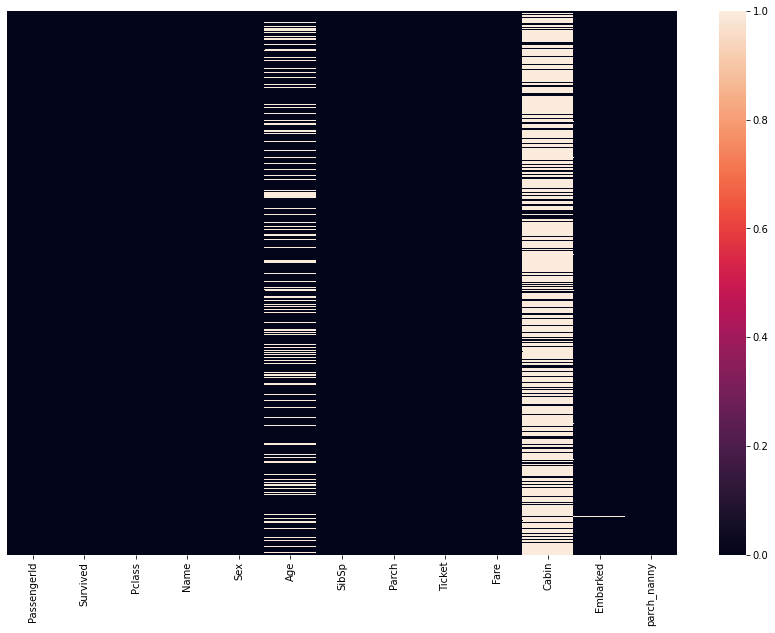

In [61]:
#Representation of null values on a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(train_data.isnull(),yticklabels=False)


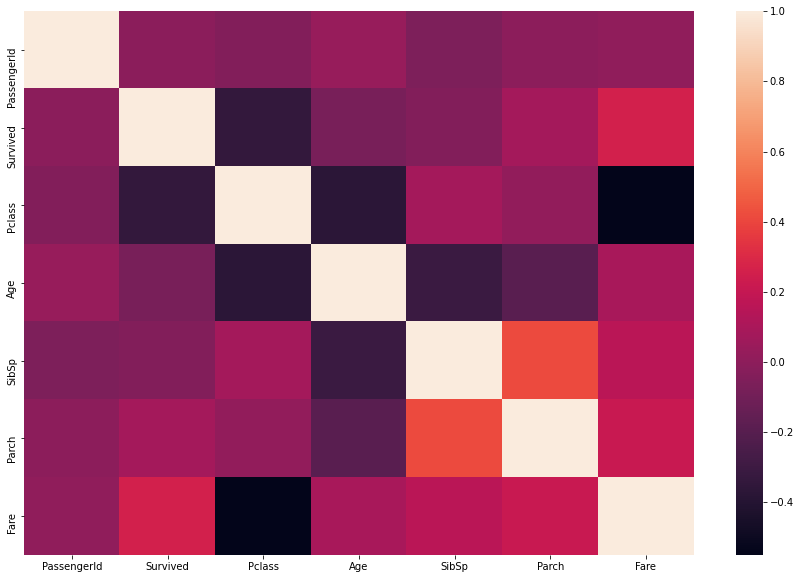

In [22]:
#finding the correclation in the dataset
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),)

The lighter the the color, the more stronget the correlation betweent the variables 

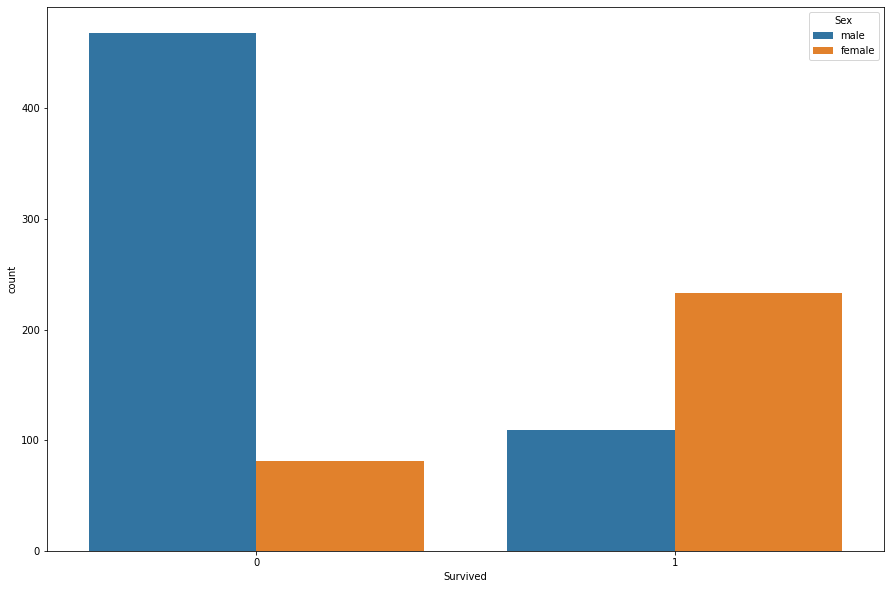

In [25]:
#Survivals in terms of Sex
plt.figure(figsize=(15,10))
sns.countplot(x="Survived",data=train_data,hue='Sex')

More Females Survived than me 

In [26]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

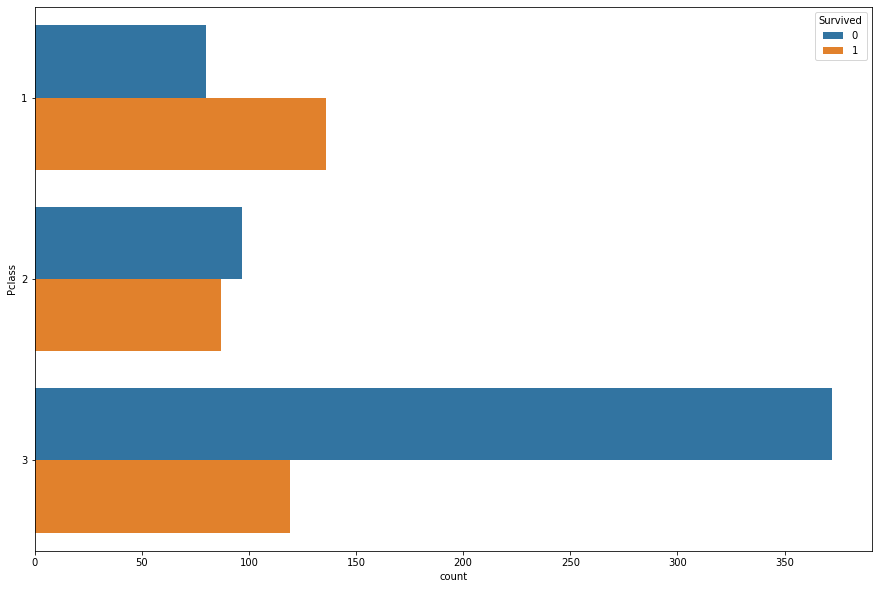

In [28]:
#Survivals in terms of Sex
plt.figure(figsize=(15,10))
sns.countplot(y="Pclass",data=train_data,hue='Survived')

Shows survial rate in eact class and as you can see a vast majority of those in the third class did not survie N.B Take note of the colors and lenght of bars to really confirm this